# Consideraciones  generales
Para una correcta participación en la competencia **Data Thriatlon** sigue este formato de notebook propuestó por el equipo de data de Platzi. Esto ayudará en la calificación de tu notebook.

Secciones del notebook:

* Extracción de datos adicionales (0-20%)
* Limpieza y transformación de datos. (0-20%)
* Analisís exploratorio (*analytics, data visualization y storytelling*). (0-60%)
* Modelo (opcional).

*Para revisar las reglas de la competencia ve a este [blogpost](https://platzi.com/blog/olimpiadas-data-triathlon/).

# ¿Qué hay en los datos?

En los datos encontrarás información de las **exportaciones e importaciones de Colombia de 1962 a 2017**. Fueron extraídos del [OEC: The Observatory of Economic Complexity](https://legacy.oec.world/en/).

Tu labor será desarrollar un análisis exploratorio para encontrar insights valiosos a partir de esos datos y otros que recopiles.



## Preguntas

Para el desarrollo de tu análisis puedes resolver las siguientes preguntas:

1. ¿Cuál es el top 10 países a los que Colombia exporta sus productos y su evolución con respecto al tiempo?
2. ¿Cuál es el top 10 países de los que Colombia importa sus productos y su evolución con respecto al tiempo?
3. ¿Existe algún producto que debido a cambios económicos en la oferta/demanda halla causado un decremento en el volumen de dinero que se mueve con él?
4. ¿Cuáles sectores económicos tienen mayor importancia en las exportaciones de Colombia y por qué?

**También puedes resolver preguntas que a ti se te ocurran.**

In [ ]:
import io
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
colombia_exports = pd.read_csv('/content/drive/MyDrive/colombia_exports.csv', sep='|')

In [ ]:
groups_sitc = pd.read_csv('/content/drive/MyDrive/groups_sitc_rev2.csv', sep='|')

In [ ]:
products_sitc = pd.read_csv('/content/drive/MyDrive/products_sitc_rev2.csv', sep='|')

In [ ]:
colombia_imports = pd.read_csv('/content/drive/MyDrive/colombia_imports.csv', sep='|')

In [ ]:
country_names = pd.read_csv('/content/drive/MyDrive/country_names.csv', sep='|')

# Extracción de datos adicionales (0-20%)

Para extraer información adicional a la proporcionada por Platzi puedes extraerla directamente de la fuente de datos original. El dataset cuenta con la información extraída del *OEC: The Observatory of Economic Complexity*, específicamente de la versión legacy la cual permite la descarga de archivos a partir de una URL y de la API expuesta por ellos.

- [https://legacy.oec.world/en/resources/data/](https://legacy.oec.world/en/resources/data/)
- [https://legacy.oec.world/api/](https://legacy.oec.world/api/)

**Para tu análisis recolecta más datos de esta y otras fuentes que veas necesarias.**

# Limpieza y transformación de datos (0-20%)

Para la limpieza de datos puedes utilizar herramientas como Pandas y numpy con el fin de limpiar y estructurar todo tipo de datos nulos o vacíos que no sean necesarios para el análisis de los datos requeridos.

In [ ]:
def delete_unnamed_0(data):
  data.drop(columns=['Unnamed: 0'], inplace=True)
  return data

**Colombian exports data cleaning process**

In [ ]:
colombia_exports = delete_unnamed_0(colombia_exports)
colombia_exports.rename(columns={'Unnamed: 0.1':'export_id'}, inplace=True)
colombia_exports.head(10)

,export_id,year,origin,dest,sitc4,export_val
0,761445,1962,col,civ,1210,12000.0
1,761448,1962,col,dza,1210,112000.0
2,761449,1962,col,egy,2472,6000.0
3,761455,1962,col,mar,1210,164000.0
4,761456,1962,col,mar,711,5000.0
5,761457,1962,col,mdg,1210,29000.0
6,761460,1962,col,nga,7230,5000.0
7,761461,1962,col,nga,7499,8000.0
8,761463,1962,col,nga,1210,9000.0
9,761465,1962,col,tun,1210,71000.0


In [ ]:
colombia_imports = delete_unnamed_0(colombia_imports)
colombia_imports.rename(columns={'Unnamed: 0.1':'import_id', 'export_val':'import_val'}, inplace=True)
colombia_imports.head(10)

,import_id,year,origin,dest,sitc4,import_val
0,11564,1962,civ,col,712,13000.0
1,17741,1962,cod,col,2925,2000.0
2,20216,1962,cog,col,2925,2000.0
3,29089,1962,egy,col,2631,40000.0
4,32443,1962,eth,col,2922,4000.0
5,47456,1962,ken,col,5320,2000.0
6,47457,1962,ken,col,752,15000.0
7,47458,1962,ken,col,2682,22000.0
8,62938,1962,mdg,col,751,1000.0
9,62939,1962,mdg,col,752,37000.0


In [ ]:
groups_sitc = delete_unnamed_0(groups_sitc)

In [ ]:
groups_sitc['temp_sitc'] = groups_sitc['id'].astype(str)
groups_sitc.rename(columns={'category':'category_group'}, inplace=True)
groups_sitc.head()

,id,category_group,temp_sitc
0,0,Live animals other than animals of division 03,0
1,1,Meat and meat preparations,1
2,2,Dairy products and birds' eggs,2
3,3,"Fish, crustaceans, molluscs and preparations t...",3
4,4,Cereals and cereal preparations,4


In [ ]:
products_sitc = delete_unnamed_0(products_sitc)
products_sitc

,id,sitc,name
0,105722,5722,Initiating Devices
1,105838,5838,Polymerization Ion Exchangers
2,106250,6250,"Rubber tires, tire cases, inner and flaps, for..."
3,106251,6251,Car Tires
4,106280,6280,Other articles of rubber
...,...,...,...
983,909310,9310,Unclassified Transactions
984,909410,9410,Miscellaneous Live Animals
985,909610,9610,Non-Gold Coin
986,xx0010,10,Live animals chiefly for food


In [ ]:
country_names = delete_unnamed_0(country_names)
country_names.head()

,id,id_3char,name
0,afago,ago,Angola
1,afbdi,bdi,Burundi
2,afben,ben,Benin
3,afbfa,bfa,Burkina Faso
4,afbwa,bwa,Botswana


In [ ]:
country_names_dest = country_names.rename(columns={'id_3char': 'dest'})

country_names_merge = colombia_exports.merge(
    country_names_dest, 
    on=['dest'], 
    how='left'
  )

country_names_merge.drop(columns=['origin', 'id'],inplace=True)
country_names_merge.rename(columns={'sitc4':'sitc'}, inplace=True)
country_names_merge.head(10)

,export_id,year,dest,sitc,export_val,name
0,761445,1962,civ,1210,12000.0,Cote d'Ivoire
1,761448,1962,dza,1210,112000.0,Algeria
2,761449,1962,egy,2472,6000.0,Egypt
3,761455,1962,mar,1210,164000.0,Morocco
4,761456,1962,mar,711,5000.0,Morocco
5,761457,1962,mdg,1210,29000.0,Madagascar
6,761460,1962,nga,7230,5000.0,Nigeria
7,761461,1962,nga,7499,8000.0,Nigeria
8,761463,1962,nga,1210,9000.0,Nigeria
9,761465,1962,tun,1210,71000.0,Tunisia


In [ ]:
country_category_exportations_merge = country_names_merge.merge(products_sitc, on=['sitc'], how='left')
country_category_exportations_merge.rename(columns={'name_y': 'product_category', 'name_x':'country'}, inplace=True)
country_category_exportations_merge.head(10)

,export_id,year,dest,sitc,export_val,country,id,product_category
0,761445,1962,civ,1210,12000.0,Cote d'Ivoire,731210,Tobacco unmanufactured; tobacco refuse
1,761448,1962,dza,1210,112000.0,Algeria,731210,Tobacco unmanufactured; tobacco refuse
2,761449,1962,egy,2472,6000.0,Egypt,202472,Non-Coniferous Sawlogs
3,761455,1962,mar,1210,164000.0,Morocco,731210,Tobacco unmanufactured; tobacco refuse
4,761456,1962,mar,711,5000.0,Morocco,750711,Coffee
5,761457,1962,mdg,1210,29000.0,Madagascar,731210,Tobacco unmanufactured; tobacco refuse
6,761460,1962,nga,7230,5000.0,Nigeria,107230,Civil engineering equipment
7,761461,1962,nga,7499,8000.0,Nigeria,107499,Miscellaneous Non-Electrical Machinery Parts
8,761463,1962,nga,1210,9000.0,Nigeria,731210,Tobacco unmanufactured; tobacco refuse
9,761465,1962,tun,1210,71000.0,Tunisia,731210,Tobacco unmanufactured; tobacco refuse


In [ ]:
country_category_exportations_merge['temp_sitc'] = country_category_exportations_merge['sitc'].apply(lambda x: str(x)[:-2])
merged_full_exportations = country_category_exportations_merge.merge(groups_sitc, on=['temp_sitc'], how='left')
merged_full_exportations.head()

,export_id,year,dest,sitc,export_val,country,id_x,product_category,temp_sitc,id_y,category_group
0,761445,1962,civ,1210,12000.0,Cote d'Ivoire,731210,Tobacco unmanufactured; tobacco refuse,12,12.0,Tobacco and tobacco manufactures
1,761448,1962,dza,1210,112000.0,Algeria,731210,Tobacco unmanufactured; tobacco refuse,12,12.0,Tobacco and tobacco manufactures
2,761449,1962,egy,2472,6000.0,Egypt,202472,Non-Coniferous Sawlogs,24,24.0,Cork and wood
3,761455,1962,mar,1210,164000.0,Morocco,731210,Tobacco unmanufactured; tobacco refuse,12,12.0,Tobacco and tobacco manufactures
4,761456,1962,mar,711,5000.0,Morocco,750711,Coffee,7,7.0,"Coffee, tea, cocoa, spices, and manufactures t..."


# Análisis exploratorio (*analytics, data visualization y storytelling* (0-60%)

El análisis exploratorio es parte fundamental para responder las preguntas propuestas por el equipo de data scientists de Platzi. 

* Mantén un código, visualizaciones y storytelling ordenados. 
* Muestra gráficas inline haciendo uso de herramientas como Matplotlib, Seaborn y otras. 
* En el storytelling la narrativa y la visualización deben tener sentido, procura que las gráficas sean visibles, aporten valor a responder las preguntas y sean lo más descriptivas posibles. 
* Además agrega textos que faciliten la narrativa del storytelling.

**How is divided the Colombian importations? Let's see the next treemap, where we can see that Colombia export a lot of primary elements as crude petroleum and coffe. Yeah, everyone knows that Colombia has the best coffe and... wait... coke? Yeah, you're right**

In [ ]:
copy_merged = merged_full_exportations.dropna()
fig = px.treemap(copy_merged, path=['category_group','product_category'], values='export_val')
fig.show()

**Where Colombia export most?**


Most preferred exporting countries: 
208           Panama
217    United States
252          Ecuador
256             Peru
260        Venezuela
Name: name, dtype: object

Less important exporting countries: 
16              Western Sahara
43                Saint Helena
70                      Bhutan
71     Cocos (Keeling) Islands
117        Yemen Arab Republic
168                 San Marino
181                    Bonaire
234                      Nauru
Name: name, dtype: object

Colombian exportations trend: 


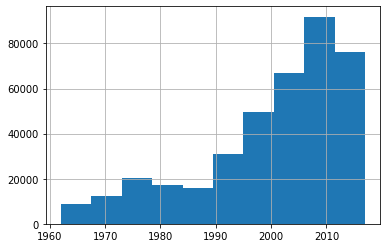

In [ ]:
preferred_exporting_countries = colombia_exports['dest'].value_counts()[:5].index.tolist()
non_preferred_exporting_countries = colombia_exports['dest'].value_counts()[-10:].index.tolist()
print("")
print("Most preferred exporting countries: ")
print(country_names[country_names['id_3char'].isin(preferred_exporting_countries)]['name'])
print("")
print("Less important exporting countries: ")
print(country_names[country_names['id_3char'].isin(non_preferred_exporting_countries)]['name'])
print("")
print("Colombian exportations trend: ")
colombia_exports['year'].hist()

Countries to which Colombia exports the highest values since 1960
              name id_3char
72           China      chn
133        Germany      deu
217  United States      usa
260      Venezuela      ven
261          World      wld


Text(0.5, 0, 'Destination')

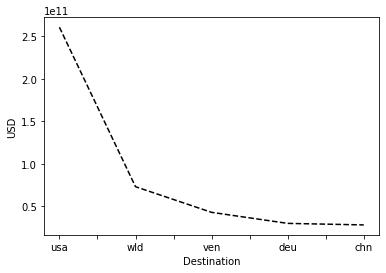

In [ ]:
most_valuable_exporting_countries = country_category_exportations_merge.groupby(['dest'])['export_val'].sum().sort_values(ascending=False)[:5]
print("Countries to which Colombia exports the highest values since 1960")
most_valuables_names = country_names[country_names['id_3char'].isin(most_valuable_exporting_countries.index)]
print(most_valuables_names[['name', 'id_3char']])
ax = most_valuable_exporting_countries.plot(style='k--', label='Exportations values')
ax.set_ylabel('USD')
ax.set_xlabel("Destination")

In [ ]:
country_category_exportations_merge[['total_exports']] = country_category_exportations_merge.groupby(['country', 'year'])['export_val'].transform('sum')
exportation_by_country = country_category_exportations_merge[['country', 'total_exports','year']].drop_duplicates(['country','year'])
exportation_by_country.set_index('year', inplace=True)
exportation_by_country.dropna(how='any', inplace=True)

Colombians exports trends by destination country


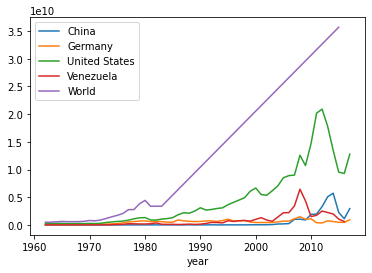

In [ ]:
fig, ax = plt.subplots()
labels=[]
for label, df in exportation_by_country[exportation_by_country['country'].isin(most_valuables_names['name'])].groupby('country'): 
  df['total_exports'].plot(ax=ax)
  labels.append(label)
print("Colombians exports trends by destination country")
plt.legend(labels)

**Data analysis by product categories**

Most exported items by Colombia: 
product_category
Crude Petroleum              2.227598e+11
Coffee                       1.085937e+11
Coal                         9.069810e+10
Bananas                      3.253784e+10
Unclassified Transactions    3.012112e+10
Flowers                      2.636372e+10
Gold                         2.123683e+10
Name: export_val, dtype: float64


Text(0, 0.5, 'USD')

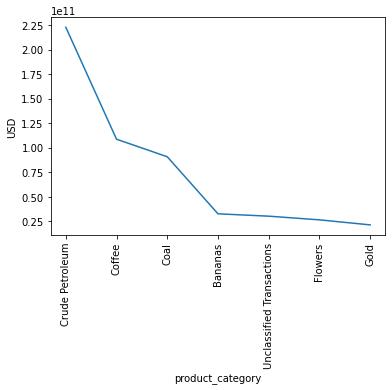

In [ ]:
print("Most exported items by Colombia: ")
print(country_category_exportations_merge.groupby('product_category')['export_val'].sum().sort_values(ascending=False)[:7])
ax = country_category_exportations_merge.groupby('product_category')['export_val'].sum().sort_values(ascending=False)[:7].plot(rot=90)
ax.set_ylabel('USD')

Most exported sitc group items by Colombia: 
category_group
Petroleum, petroleum products and related materials          2.437088e+11
Coffee, tea, cocoa, spices, and manufactures thereof         1.154750e+11
Coal, coke and briquettes                                    9.720443e+10
Vegetables and fruits                                        3.592606e+10
Crude animal and vegetable materials, n.e.s.                 2.742309e+10
Gold, non-monetary (excluding gold ores and concentrates)    2.123683e+10
Plastics in non-primary forms                                1.869143e+10
Name: export_val, dtype: float64


Text(0, 0.5, 'USD')

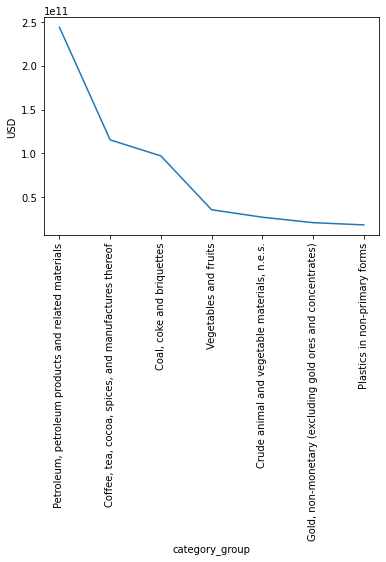

In [ ]:
merged_full_exportations
print("Most exported sitc group items by Colombia: ")
print(merged_full_exportations.groupby('category_group')['export_val'].sum().sort_values(ascending=False)[:7])
ax = merged_full_exportations.groupby('category_group')['export_val'].sum().sort_values(ascending=False)[:7].plot(rot=90)
ax.set_ylabel('USD')

**Oh yeah, we need platzi to change this!!** \
**We need to export techonology and science**

# Lets see imports!

In [ ]:
colombia_imports.drop(columns=['import_id', 'dest'], inplace=True)
colombia_imports.rename(columns={'sitc4':'sitc'}, inplace=True)

In [ ]:
colombia_imports.head()

,year,origin,sitc,import_val
0,1962,civ,712,13000.0
1,1962,cod,2925,2000.0
2,1962,cog,2925,2000.0
3,1962,egy,2631,40000.0
4,1962,eth,2922,4000.0


In [ ]:
country_names_dest['origin'] = country_names_dest['dest']
country_names_dest.drop(columns='dest', inplace=True)
country_names_dest.head()

,id,name,origin
0,afago,Angola,ago
1,afbdi,Burundi,bdi
2,afben,Benin,ben
3,afbfa,Burkina Faso,bfa
4,afbwa,Botswana,bwa


In [ ]:
country_names_merge = colombia_imports.merge(
    country_names_dest, 
    on=['origin'], 
    how='left'
  )
country_names_merge.drop(columns='id', inplace=True)

In [ ]:
country_names_merge

,year,origin,sitc,import_val,name
0,1962,civ,712,13000.0,Cote d'Ivoire
1,1962,cod,2925,2000.0,Democratic Republic of the Congo
2,1962,cog,2925,2000.0,Republic of the Congo
3,1962,egy,2631,40000.0,Egypt
4,1962,eth,2922,4000.0,Ethiopia
...,...,...,...,...,...
560487,2017,ury,5833,231.5,Uruguay
560488,2017,ury,6658,8658.0,Uruguay
560489,2017,ury,8928,3816.5,Uruguay
560490,2017,ury,8972,500.0,Uruguay


In [ ]:
most_valuable_importing_countries = country_names_merge.groupby(['origin'])['import_val'].sum().sort_values(ascending=False)[:5]
most_valuable_importing_countries

origin
usa    2.087754e+11
chn    7.088677e+10
mex    5.038123e+10
wld    4.085839e+10
bra    3.750500e+10
Name: import_val, dtype: float64

Countries from which Colombia imports the highest values since 1960
               name
27            China
2177         Mexico
2245  United States
2594         Brazil
2662          World


Text(0.5, 0, 'Destination')

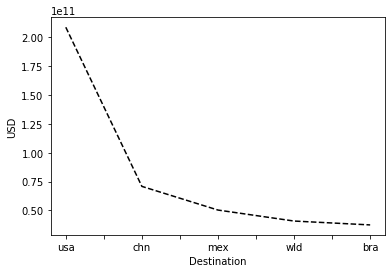

In [ ]:
print("Countries from which Colombia imports the highest values since 1960")
most_valuables_names_import = country_names_merge[country_names_merge['origin'].isin(most_valuable_importing_countries.index)]
print(most_valuables_names_import[['name']].drop_duplicates(subset=['name']))
ax = most_valuable_importing_countries.plot(style='k--', label='Exportations values')
ax.set_ylabel('USD')
ax.set_xlabel("Destination")

In [ ]:
products_import_merge = country_names_merge.merge(products_sitc, on=['sitc'], how='left')
products_import_merge.rename(columns={'name_x':'country', 'name_y':'product_category'}, inplace=True)
products_import_merge.drop(columns=['id'], inplace=True)
products_import_merge.head()

,year,origin,sitc,import_val,country,product_category
0,1962,civ,712,13000.0,Cote d'Ivoire,Coffee Extracts
1,1962,cod,2925,2000.0,Democratic Republic of the Congo,Planting Seeds and Spores
2,1962,cog,2925,2000.0,Republic of the Congo,Planting Seeds and Spores
3,1962,egy,2631,40000.0,Egypt,Raw Cotton
4,1962,eth,2922,4000.0,Ethiopia,Natural Gums


Most imported items by Colombia: 
product_category
Cars                         2.947686e+10
Unclassified Transactions    2.271402e+10
TV and Radio Transmitters    1.724147e+10
Medicaments                  1.473785e+10
Trucks and Vans              1.456828e+10
Maize                        1.240688e+10
Large Aircraft               1.188421e+10
Name: import_val, dtype: float64


Text(0, 0.5, 'USD')

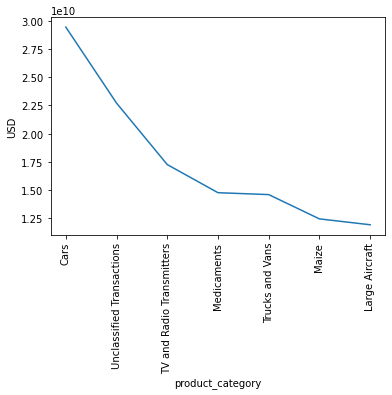

In [ ]:
print("Most imported items by Colombia: ")
print(products_import_merge.groupby('product_category')['import_val'].sum().sort_values(ascending=False)[:7])
ax = products_import_merge.groupby('product_category')['import_val'].sum().sort_values(ascending=False)[:7].plot(rot=90)
ax.set_ylabel('USD')

In [ ]:
products_import_merge['temp_sitc'] = products_import_merge['sitc'].apply(lambda x: str(x)[:-2])
merged_full_importations = products_import_merge.merge(groups_sitc, on=['temp_sitc'], how='left')
merged_full_importations.head()

,year,origin,sitc,import_val,country,product_category,temp_sitc,id,category_group
0,1962,civ,712,13000.0,Cote d'Ivoire,Coffee Extracts,7,7.0,"Coffee, tea, cocoa, spices, and manufactures t..."
1,1962,cod,2925,2000.0,Democratic Republic of the Congo,Planting Seeds and Spores,29,29.0,"Crude animal and vegetable materials, n.e.s."
2,1962,cog,2925,2000.0,Republic of the Congo,Planting Seeds and Spores,29,29.0,"Crude animal and vegetable materials, n.e.s."
3,1962,egy,2631,40000.0,Egypt,Raw Cotton,26,26.0,Textiles fibres and their wastes
4,1962,eth,2922,4000.0,Ethiopia,Natural Gums,29,29.0,"Crude animal and vegetable materials, n.e.s."


In [ ]:
copy_merged = merged_full_importations.dropna()
fig = px.treemap(copy_merged, path=['category_group','product_category'], values='import_val')
fig.show()

**Yeah, we import a lot of passives as cars and TV's, wait, is it technology right?
That's what first world exports**

# Modelo (opcional)

Si necesitas agregar un modelo para mejorar tu análisis hazlo en esta sección del notebook. **La evaluación será contada como parte del análisis exploratorio y es completamente opcional**.

- En el desarrollo del modelo se requiere una organización del código y la estructuración del propio modelo. Las celdas que ejecuten entrenamientos o búsqueda de parámetros deben estar con **verbose 0**, esto con el fin de no ensuciar la salida de código y agilizar su revisión.


#Let's do some predictions!!

In [ ]:
colombia_exports.head()

,export_id,year,origin,dest,sitc4,export_val
0,761445,1962,col,civ,1210,12000.0
1,761448,1962,col,dza,1210,112000.0
2,761449,1962,col,egy,2472,6000.0
3,761455,1962,col,mar,1210,164000.0
4,761456,1962,col,mar,711,5000.0


In [ ]:
country_category_exportations_merge[['total_exports']] = country_category_exportations_merge.groupby('year')['export_val'].transform('sum')
colombia_exports[['total_by_year']] = colombia_exports.groupby('year')['export_val'].transform('sum')
colombia_exports.drop_duplicates(subset=['year'], inplace=True)
colombia_exports.head()
X = colombia_exports['year'].to_numpy().reshape(-1, 1)
copy= colombia_exports.set_index('year')
y = copy['total_by_year'].to_numpy().reshape(-1, 1)

Historial total exportations value trend:


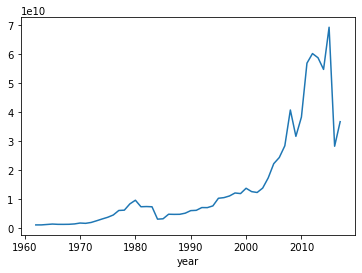

In [ ]:
print('Historical total exportations trend:')
copy['total_by_year'].plot()

In [ ]:
reg = LinearRegression().fit(X,y)

**Well... The score could be better**

In [ ]:
reg.score(X,y)

0.6374155686220329

In [ ]:
future = np.array([[2018, 2019, 2020, 2021, 2022]]).reshape(-1, 1)
predictions = reg.predict(future)
future = pd.Series([2018, 2019, 2020, 2021, 2022])
print(predictions[:,0])
predictions = pd.Series(predictions[:,0])

df= pd.concat([future, predictions], axis=1).reset_index()


[3.89954058e+10 3.98518725e+10 4.07083393e+10 4.15648061e+10
 4.24212728e+10]


In [ ]:
df.drop(columns='index', inplace=True)
df.set_index(0, inplace=True)

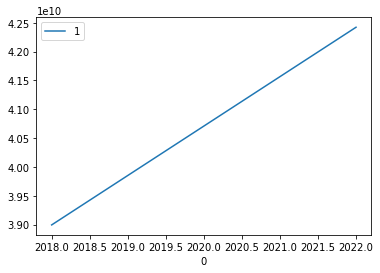

In [ ]:
df.plot()

What it means? Easy, Colombia will export USD 42500000000 in 2022.